# Setup

In [49]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# _K-means_

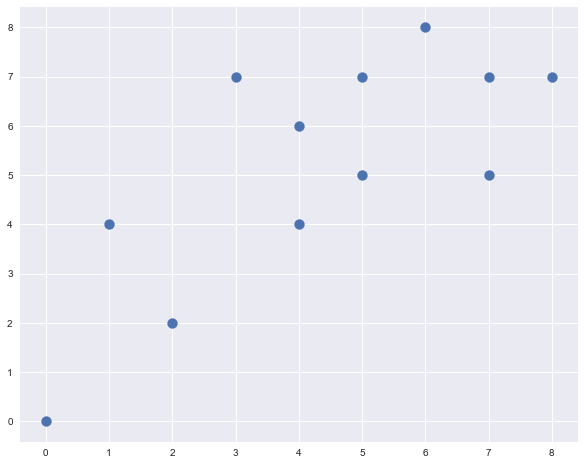

In [2]:
X = np.array([[7, 5], [5, 7], [7, 7], [4, 4], [4, 6], [1, 4],
              [0, 0], [2, 2], [8, 7], [6, 8], [5, 5], [3, 7]])
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [3]:
from sklearn.cluster import KMeans

In [27]:
def plot_cluster(model, C0, C1, n):
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], s=100, marker='v', color='r')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], s=100, marker='^', color='b')
    plt.scatter(C0[0], C0[1], s=200, color='r')
    plt.scatter(C1[0], C1[1], s=200, color='b')
    plt.title("max_iter : {}".format(n))
    plt.show()

In [12]:
def kmeans_df(model, c0, c1):
    df = pd.DataFrame(np.hstack([X, 
               np.linalg.norm(X - c0, axis=1)[:, np.newaxis],
               np.linalg.norm(X - c1, axis=1)[:, np.newaxis],
               model.labels_[:, np.newaxis]]), columns=['x0', 'x1', 'd0', 'd1', 'c'])
    return df

In [6]:
def cal_new_centroid(model, c0, c1):
    c0_new = X[model.labels_ == 0, 0].mean(), X[model.labels_ == 0, 1].mean()
    c1_new = X[model.labels_ == 1, 0].mean(), X[model.labels_ == 1, 1].mean()
    return c0_new, c1_new

### 1회차

In [7]:
model1 = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

In [8]:
c0, c1 = model1.cluster_centers_
c0, c1

(array([6.6, 6.8]), array([2.71428571, 4.        ]))

In [9]:
model1.score(X)

-63.00408163265301

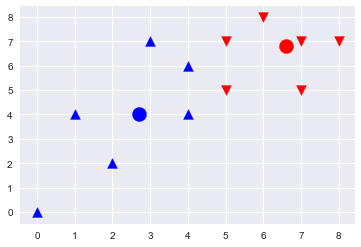

In [10]:
plot_cluster(model1, c0, c1)

In [13]:
kmeans_df(model1, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [14]:
cal_new_centroid(model1, c0, c1)

((6.333333333333333, 6.5), (2.3333333333333335, 3.8333333333333335))

### 2회차

In [15]:
model2 = KMeans(n_clusters=2, init='random', n_init=1, max_iter=2, random_state=1).fit(X)
model2

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=2, n_clusters=2,
    n_init=1, n_jobs=1, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

In [21]:
model2.cluster_centers_

array([[6.33333333, 6.5       ],
       [2.33333333, 3.83333333]])

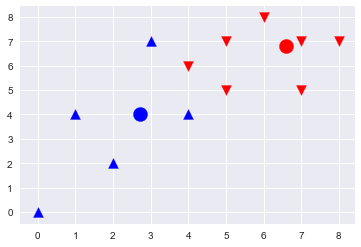

In [17]:
plot_cluster(model2, c0, c1)

In [18]:
kmeans_df(model2, c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,0.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [19]:
cal_new_centroid(model2, c0, c1)

((6.0, 6.428571428571429), (2.0, 3.4))

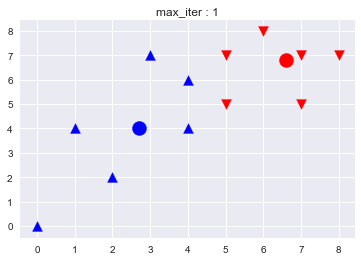

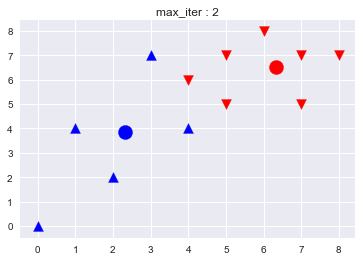

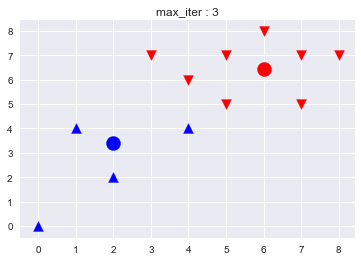

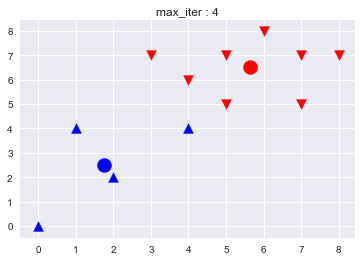

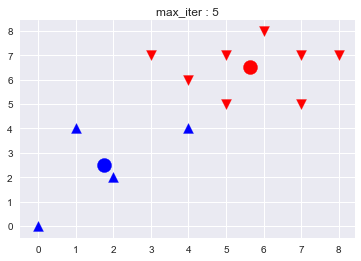

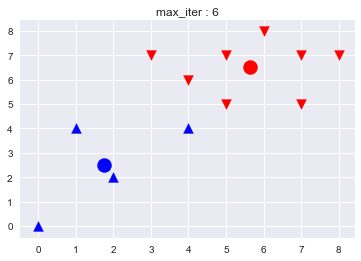

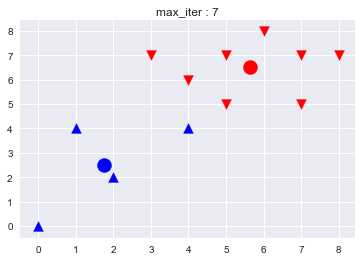

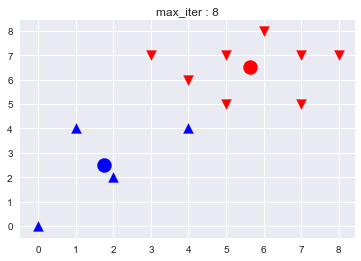

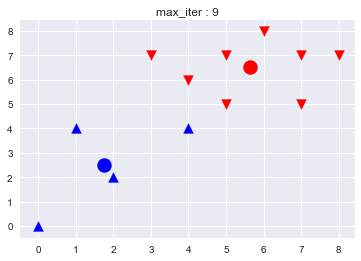

In [29]:
for i in range(1, 10):    
    model = KMeans(n_clusters=2, init='random', n_init=1, max_iter=i, random_state=1).fit(X)
    c0, c1 = model.cluster_centers_
    plot_cluster(model, c0, c1, i)

# _Kmeans++_

### 예제 1 : iris data
- - -

In [30]:
from sklearn.cluster import KMeans
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [33]:
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [35]:
model3 = KMeans(n_clusters=3, max_iter=10)
model3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
labels = model3.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [60]:
def plot_iris_cluster(model):
    fig = plt.figure()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    model.fit(X)
    labels = model.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=50, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.show()

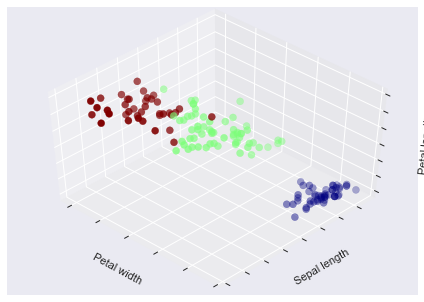

In [61]:
plot_iris_cluster(model3)

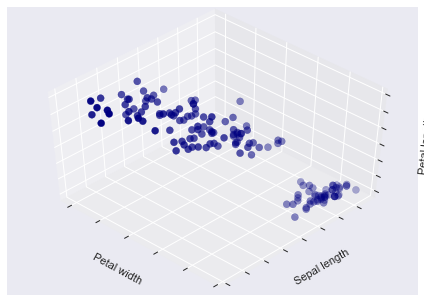

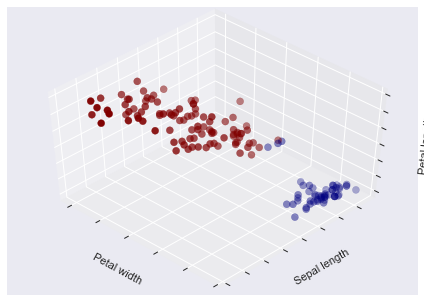

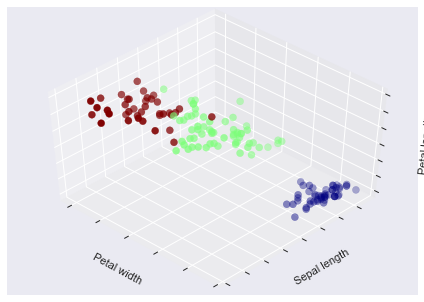

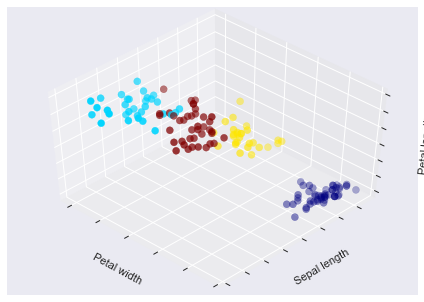

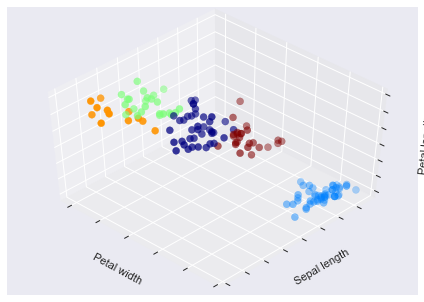

In [62]:
for i in range(1, 6):
    model = KMeans(n_clusters=i)
    plot_iris_cluster(model)

# _클러스터의 성능 기준_

### 정확한 답(클러스터 갯수 및 소속)을 알고 있는 경우
- - -

- homogeneity
- completeness
- v_measure

In [63]:
from sklearn import metrics

In [64]:
model = KMeans(n_clusters=3)

In [65]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
y_pred = model.labels_
y_true = y.copy()

In [72]:
print(metrics.homogeneity_score(y_true, y_pred))
print(metrics.completeness_score(y_true, y_pred))
print(metrics.v_measure_score(y_true, y_pred))
print(metrics.homogeneity_completeness_v_measure(y_true, y_pred))

0.7514854021988339
0.7649861514489816
0.7581756800057786
(0.7514854021988339, 0.7649861514489816, 0.7581756800057786)


### 정확한 답(클러스터의 소속 및 갯수)를 모르는 경우
- - - 

- 실루엣 계수

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


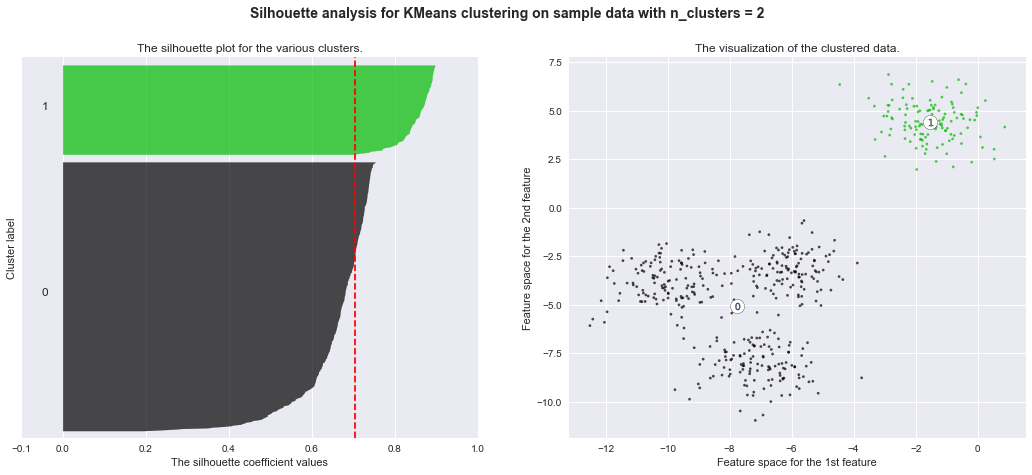

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


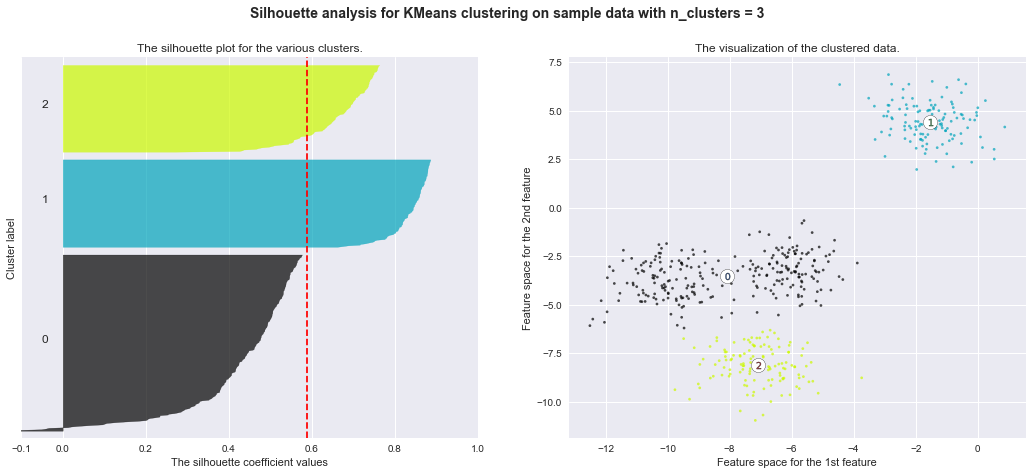

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


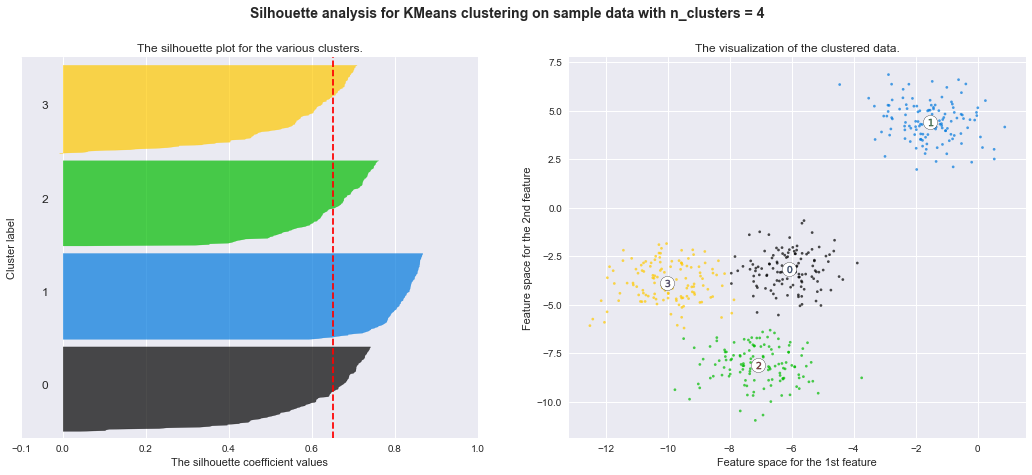

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


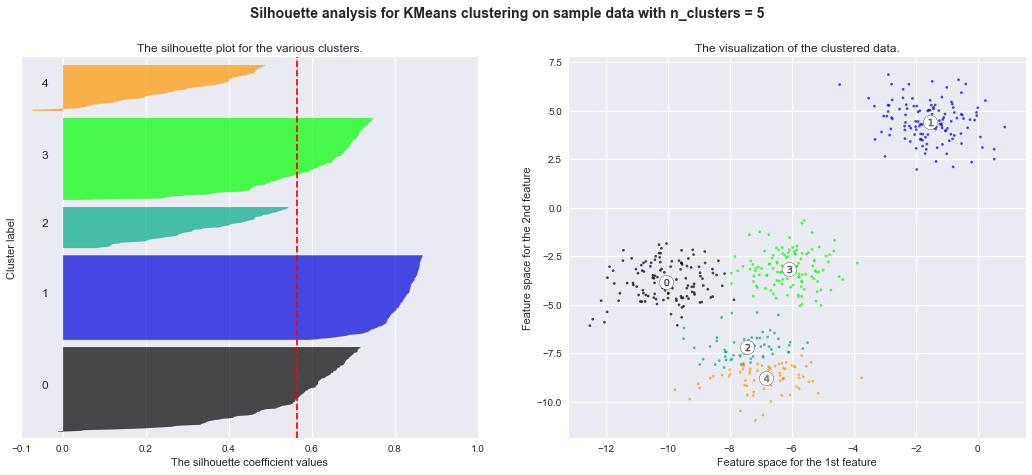

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


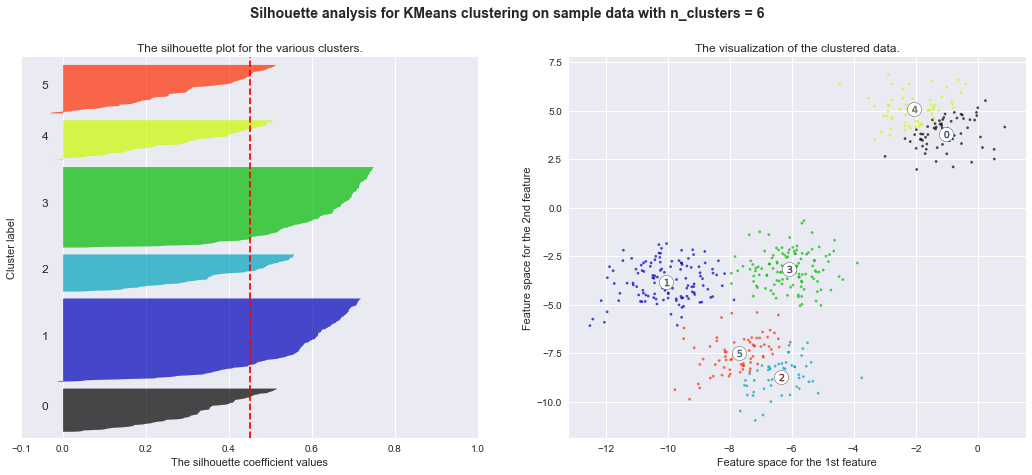

In [80]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()